In [1]:
import os
import pandas as pd # Create dataframe and read data
import numpy as np
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

LOAD DATASET

In [2]:
file_name = "housing.csv"
file_path =  os.path.join(os.getcwd(), file_name) 

In [3]:
dataset = pd.read_csv(file_path)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Missing Data Analysis

In [6]:
# Check for missing values
missing_value = dataset.isnull().sum()

# Calculate the precentage of missing data in each column
missing_precentage = (missing_value/len(dataset)) * 100

# Dislay missing data
print("Missing data in each column:\n", missing_value)
print("\n Precentage of MISSING DATA:\n", missing_precentage)

Missing data in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Precentage of MISSING DATA:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [7]:
# Remove row missing data
data_cleanup = dataset.dropna()

# Verify dta is clean_up
print(data_cleanup.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Data Exploration and Visualization

In [8]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


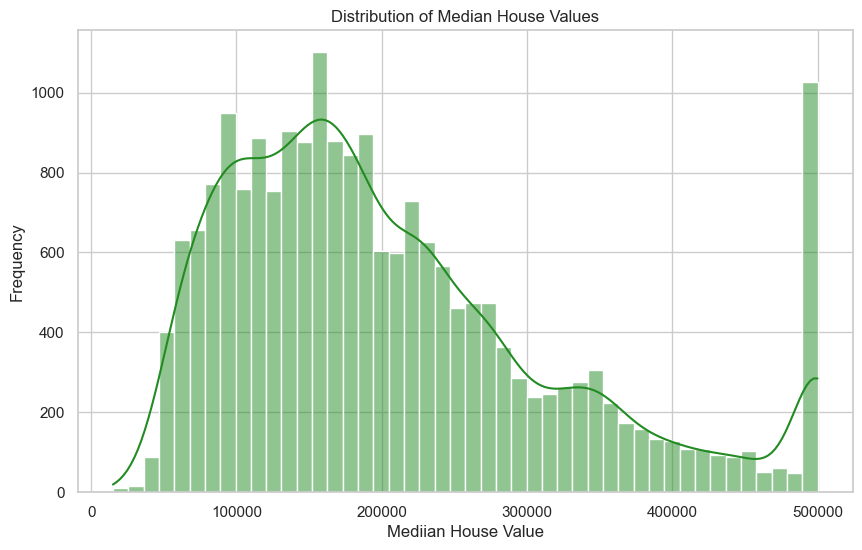

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleanup['median_house_value'], color='forestgreen', kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Mediian House Value")
plt.ylabel("Frequency")
plt.show()

Using InterQualtile Range to removw outlier

In [10]:
# Assuming dataset in dataframe and media_house_value is column of interrest
Q1 = data_cleanup['median_house_value'].quantile(0.25)
Q3 = data_cleanup['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Define bound for outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 *IQR

# Remove Outlie
data_no_outlier_1 = data_cleanup[(data_cleanup['median_house_value'] >= lower_bound) & (data_cleanup['median_house_value'] <= upper_bound)]

# Check shape of data
print("Original shape: ", data_cleanup.shape)
print("New data: ", data_no_outlier_1.shape)

Original shape:  (20433, 10)
New data:  (19369, 10)


BoxPlot Outlier Detection

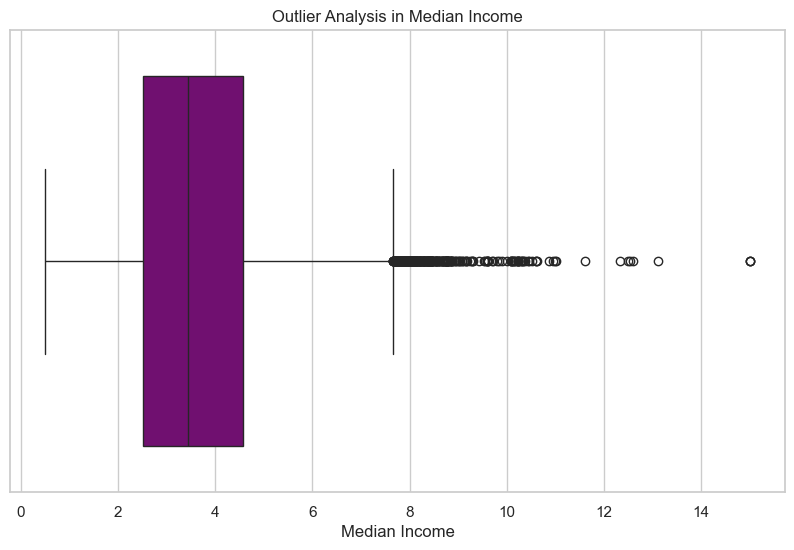

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outlier_1['median_income'], color="purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [12]:
# Calculate Q1 and Q3 
Q1 = data_no_outlier_1['median_income'].quantile(0.25)
Q3 = data_no_outlier_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outlier
data_no_outlier_2 = data_no_outlier_1[(data_no_outlier_1['median_income'] >= lower_bound) & (data_no_outlier_1['median_income'] <= upper_bound)]

# Check shape
print("Original data shape: ", data_no_outlier_1.shape)
print("New Outlier 2: ", data_no_outlier_2.shape)

Original data shape:  (19369, 10)
New Outlier 2:  (19026, 10)


In [13]:
data = data_no_outlier_2

Correlation HeatMap

In [14]:
print(data.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


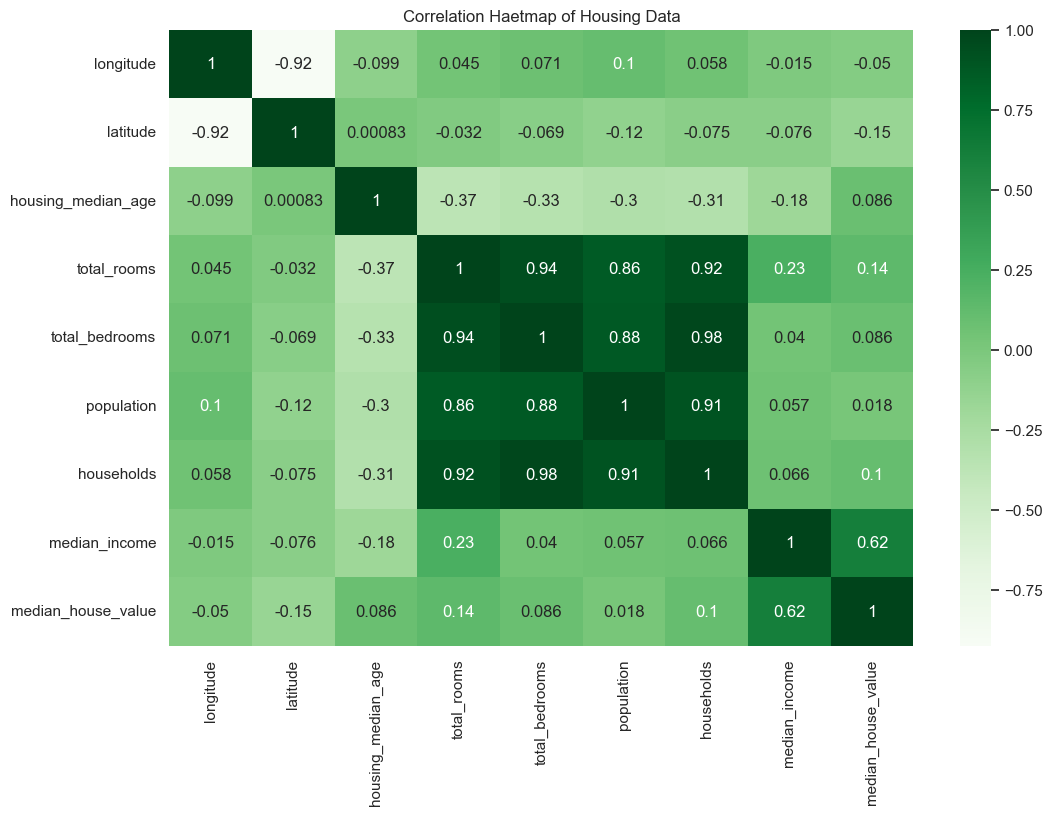

In [15]:
numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Greens")
plt.title("Correlation Haetmap of Housing Data")
plt.show()

In [16]:
data = data.drop("total_bedrooms", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [17]:
# Unique value count for categorical data
for column in ['ocean_proximity']: # Add other cat column if any 
    print(f"Unique valie in {column}", data[column].unique())

Unique valie in ocean_proximity ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [18]:
ocean_prox_dummy = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_prox_dummy], axis=1)
ocean_prox_dummy

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [19]:
data = data.drop("ocean_proximity_ISLAND", axis=1)


In [20]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Split Train-test dataset

In [21]:
# Define feature

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'population', 'households', 'median_income', 'median_house_value',
    'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
    'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

X = data[features]
Y = data[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1111)

print(f"Training size: {X_train.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

Training size: 15220 samples
Test size: 3806 samples


Training

In [33]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
#fit model
model_fitted = sm.OLS(Y_train, X_train_constant).fit()

print(model_fitted.summary())